# Logistic regression

In [1]:
%autosave 60

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Autosaving every 60 seconds


In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(1)**(-z))

In [3]:
def cost(x, theta, y, m):
    out = sigmoid(x.dot(theta))
    return -np.sum(np.multiply(y, np.log(out)) + np.multiply(1-y, np.log(1 - out)))/m

In [4]:
data = pd.read_csv('data/logistic_reg.txt', header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


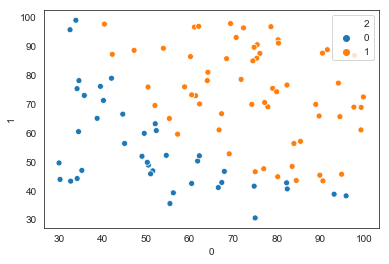

In [5]:
sns.set_style('white')
sns.scatterplot(data.iloc[:,0],data.iloc[:,1],hue=data.iloc[:,2]);

In [6]:
data = np.array(data.values, dtype = np.float64)

# Feature normalization
for i in range(len(data[0])):
    data[:,i] = data[:,i]/(max(data[:,i]) - min(data[:,i]))

data[:5]

array([[0.49626112, 1.14294811, 0.        ],
       [0.43409961, 0.64299778, 0.        ],
       [0.51380112, 1.06791102, 0.        ],
       [0.86259756, 1.26429458, 1.        ],
       [1.13277668, 1.10368538, 1.        ]])

In [7]:
split = int(0.8*len(data))
x = data[:split, :2]
x = np.insert(x, 0, 1, axis=1)
y = np.expand_dims(data[:split, 2], axis=1)

test_x = data[split:, :2]
test_x = np.insert(test_x, 0, 1, axis=1)
test_y = np.expand_dims(data[split:, 2], axis=1)

print('x shape\ty_shape')
print(x.shape, y.shape)

x shape	y_shape
(80, 3) (80, 1)


In [8]:
def train(x, y, m, lr, itr):
    np.random.seed(103)
    num_ftrs = len(x[0])
    history = []
    theta = np.random.rand(num_ftrs) 
    theta = np.expand_dims(theta, axis=1)
    
    for i in range(itr):
        z = x.dot(theta)
        h = sigmoid(z)
        diff = x.T.dot(h - y)/m 
        theta = theta - lr*diff
        history.append(cost(x, theta, y, len(y)))
    
    return theta, history

lr	itr	error
0.01	50	0.5007647628075474
0.01	100	0.5184497880690938
0.01	200	0.541642067259839
0.01	500	0.5583944156574662
0.01	1000	0.5468068342347566
0.01	5000	0.45227117130382233
0.01	10000	0.38361767846521844
0.03	50	0.5321213605262274
0.03	100	0.5532740250435418
0.03	200	0.5573117939717102
0.03	500	0.5322592056336118
0.03	1000	0.49354998940202544
0.03	5000	0.3431355386092413
0.03	10000	0.2860666698180788
0.001	50	0.4810357472916781
0.001	100	0.4833893666981138
0.001	200	0.48797554837802126
0.001	500	0.5007054173680647
0.001	1000	0.5183540102268538
0.001	5000	0.5583527727040059
0.001	10000	0.5468047983662037
0.003	50	0.4857074320771
0.003	100	0.49240231040041077
0.003	200	0.504607990534379
0.003	500	0.5317844402891889
0.003	1000	0.5529967139018966
0.003	5000	0.5322625236223884
0.003	10000	0.49355614262969355

Lowest error:0.2860666698180788 for lr:0.03 and itr:10000

Plotting graph for lowest error...


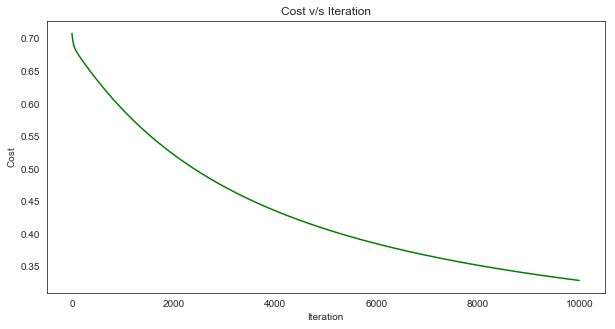

In [9]:
best_theta = best_history = None
best_lr = best_itr = 0
prev_cost = 1

print('lr\titr\terror')
for lr in [0.01, 0.03, 0.001, 0.003]:
    for itr in [50, 100, 200, 500, 1000, 5000, 10000]:
        theta, history = train(x, y, len(x), lr, itr)
        # loss on test data
        curr_cost = cost(test_x, theta, test_y, len(test_x))
        print('{}\t{}\t{}'.format(lr, itr, curr_cost))
        if curr_cost < prev_cost:
            prev_cost = curr_cost
            best_lr = lr
            best_itr = itr
            best_theta = theta
            best_history = history
            
print('\nLowest error:{} for lr:{} and itr:{}'.format(prev_cost, best_lr, best_itr))

print('\nPlotting graph for lowest error...')
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(10)

ax.plot(range(best_itr), best_history, 'g')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.title.set_text('Cost v/s Iteration')

In [10]:
# Checking results manually
best_out = sigmoid(test_x.dot(best_theta))
print('output\tactual')
print(*[(np.round(best_out[i])[0], test_y[i][0]) for i in range(len(test_x))], sep='\n')

output	actual
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(0.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(0.0, 0.0)
(1.0, 1.0)
(1.0, 1.0)
(0.0, 0.0)
(1.0, 1.0)
(1.0, 1.0)
(0.0, 0.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(0.0, 1.0)
(1.0, 1.0)
